In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from sklearn.metrics import classification_report, confusion_matrix

tf.random.set_seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from string import punctuation
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import textwrap

%matplotlib inline

In [4]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Mineria_Web/Trabajo_final/tripadvisor_hoteles_cusco_lang.csv")
dataset.head()

,f1_hotel,f2_costo,f3_cliente,f4_titulo,f5_contenido,f6_calificacion,f7_fecHosped,f8_page,languaje,prob_lang
0,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Wayne S,Neat little place in the center of Cusco.,Nice boutique hotel. Staff were very friendly ...,50,October 2023,1.0,en,1.0
1,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Leslie W,Perfect hotel and experience,My husband and I stayed here for two nights wh...,50,September 2023,1.0,en,1.0
2,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Mimi,Amazing stay at Cusco,We had a pleasant stay at this hotel for 3 nig...,50,September 2023,1.0,en,1.0
3,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",T0niaYVR,Amazing service and hospitality received,From the start of my stay to the end of it I f...,50,August 2023,1.0,en,1.0
4,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Natacha Talbot,Breathtaking place and walkable to everything,"If you come to Cusco, this is the place to sta...",50,July 2023,1.0,en,1.0


In [5]:
len(dataset)

41486

In [5]:
dataset.iloc[15000]['f5_contenido']

'This was my favorite place I stayed in while I was in Perú. Coco and his family are warm and welcoming, and we were always greeted with warm smiles every day. Also, the pancakes are fantastic! I would very much recommend this place for someone who is looking for a simple, but friendly place to stay in Cusco.'

In [116]:
dataset.f6_calificacion.value_counts()

50    24465
40    10165
30     3770
20     1601
10     1485
Name: f6_calificacion, dtype: int64

# PREPOCESAMIENTO

In [6]:
#Eliminacion de filas con NaN values
dataset = dataset[dataset['f5_contenido'].notna()]
dataset = dataset[dataset['f6_calificacion'].notna()]

In [7]:
print(len(dataset))
dataset

41486


,f1_hotel,f2_costo,f3_cliente,f4_titulo,f5_contenido,f6_calificacion,f7_fecHosped,f8_page,languaje,prob_lang
0,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Wayne S,Neat little place in the center of Cusco.,Nice boutique hotel. Staff were very friendly ...,50,October 2023,1.0,en,1.0
1,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Leslie W,Perfect hotel and experience,My husband and I stayed here for two nights wh...,50,September 2023,1.0,en,1.0
2,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Mimi,Amazing stay at Cusco,We had a pleasant stay at this hotel for 3 nig...,50,September 2023,1.0,en,1.0
3,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",T0niaYVR,Amazing service and hospitality received,From the start of my stay to the end of it I f...,50,August 2023,1.0,en,1.0
4,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Natacha Talbot,Breathtaking place and walkable to everything,"If you come to Cusco, this is the place to sta...",50,July 2023,1.0,en,1.0
...,...,...,...,...,...,...,...,...,...,...
41481,Hanaq Wasi,NaN,Aalonsor,Cerrado,El hotel no había recibido la reserva por que ...,20,December 2015,NaN,es,1.0
41482,Santa Ana Departamentos,NaN,chengtse,空間寬敞+親切的屋主,我們在造訪馬丘比丘前後共在此公寓住了三個晚上，其中很感謝屋主讓我們將主要的行李留在此地，方便...,50,September 2019,NaN,zh,1.0
41483,Tunky Wasi - Sapan Sachayoc,NaN,Nancy C,Excellent,Atendido por sus propietarios te hacen sentir ...,50,October 2019,NaN,es,1.0
41484,Hospedaje Casa de Pajaros,NaN,Ori,Very friendly and welcoming,Came in through a friend's recommendation and ...,50,October 2019,NaN,en,1.0


In [8]:
from string import punctuation

dataset['text_process'] = dataset['f5_contenido'].str.lower()

dictionary_to_remove_punctuation = str.maketrans({char: None for char in punctuation})

#Quitamos la puntuación
dataset['text_process'] = dataset['f5_contenido'].str.translate(dictionary_to_remove_punctuation)



In [9]:
dataset.head()

,f1_hotel,f2_costo,f3_cliente,f4_titulo,f5_contenido,f6_calificacion,f7_fecHosped,f8_page,languaje,prob_lang,text_process
0,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Wayne S,Neat little place in the center of Cusco.,Nice boutique hotel. Staff were very friendly ...,50,October 2023,1.0,en,1.0,Nice boutique hotel Staff were very friendly a...
1,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Leslie W,Perfect hotel and experience,My husband and I stayed here for two nights wh...,50,September 2023,1.0,en,1.0,My husband and I stayed here for two nights wh...
2,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Mimi,Amazing stay at Cusco,We had a pleasant stay at this hotel for 3 nig...,50,September 2023,1.0,en,1.0,We had a pleasant stay at this hotel for 3 nig...
3,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",T0niaYVR,Amazing service and hospitality received,From the start of my stay to the end of it I f...,50,August 2023,1.0,en,1.0,From the start of my stay to the end of it I f...
4,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Natacha Talbot,Breathtaking place and walkable to everything,"If you come to Cusco, this is the place to sta...",50,July 2023,1.0,en,1.0,If you come to Cusco this is the place to stay...


In [10]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
dataset_mezclado=dataset.sample(frac=1, random_state=42)

In [12]:
# revisemos data variable del dataset:
# Dado al desbalance del dataset solo consideraremos como buena reseña a aquellos marcados con 5 estrellas.
import random
random_index = random.randint(0, len(dataset)-5)

for row in dataset_mezclado[["text_process", "f6_calificacion"]][random_index:random_index+3].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(buena reseña)" if target >= 41 else "(mala reseña)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 40 (mala reseña)
Text:
The staff were very helpful with locating restaurants calling cabs providing bottled water and answering questions  The rooms were great very clean and updated with plenty of space to put your belongings and a very nice size shower  The location is a bit away from most everything else which is fine as we are ok with walking but not sure I would walk it at night  The street was under construction I think or it was just left a complete messDear chrisp125  First of all we would like to thank you for sharing your experience in our hotel with us and with the rest of the users We are glad to know that you enjoyed our facilities services and location All the staff work every day to give the best of themselves and make the stay of each guest unique and unforgettable so we are happy to know that we meet your expectations We hope to have you back is this your home to you and your beautiful family on your next visit to Cusco Receive a warm greeting from the entire t

In [13]:
#Normalizando puntajes de mayor 41 buena resenha =1, valores menores =0 siendo mala reseña

dataset['calificacion_final'] = np.where(dataset['f6_calificacion'] >= 41, 1, 0)
dataset['calificacion_final'].value_counts()

1    24465
0    17021
Name: calificacion_final, dtype: int64

In [14]:
dataset.head()

,f1_hotel,f2_costo,f3_cliente,f4_titulo,f5_contenido,f6_calificacion,f7_fecHosped,f8_page,languaje,prob_lang,text_process,calificacion_final
0,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Wayne S,Neat little place in the center of Cusco.,Nice boutique hotel. Staff were very friendly ...,50,October 2023,1.0,en,1.0,Nice boutique hotel Staff were very friendly a...,1
1,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Leslie W,Perfect hotel and experience,My husband and I stayed here for two nights wh...,50,September 2023,1.0,en,1.0,My husband and I stayed here for two nights wh...,1
2,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Mimi,Amazing stay at Cusco,We had a pleasant stay at this hotel for 3 nig...,50,September 2023,1.0,en,1.0,We had a pleasant stay at this hotel for 3 nig...,1
3,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",T0niaYVR,Amazing service and hospitality received,From the start of my stay to the end of it I f...,50,August 2023,1.0,en,1.0,From the start of my stay to the end of it I f...,1
4,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Natacha Talbot,Breathtaking place and walkable to everything,"If you come to Cusco, this is the place to sta...",50,July 2023,1.0,en,1.0,If you come to Cusco this is the place to stay...,1


In [15]:
dataset_ingles = dataset[dataset['languaje'] == 'en'].drop(columns=['languaje'])

In [16]:
dataset_ingles

,f1_hotel,f2_costo,f3_cliente,f4_titulo,f5_contenido,f6_calificacion,f7_fecHosped,f8_page,prob_lang,text_process,calificacion_final
0,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Wayne S,Neat little place in the center of Cusco.,Nice boutique hotel. Staff were very friendly ...,50,October 2023,1.0,1.0,Nice boutique hotel Staff were very friendly a...,1
1,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Leslie W,Perfect hotel and experience,My husband and I stayed here for two nights wh...,50,September 2023,1.0,1.0,My husband and I stayed here for two nights wh...,1
2,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Mimi,Amazing stay at Cusco,We had a pleasant stay at this hotel for 3 nig...,50,September 2023,1.0,1.0,We had a pleasant stay at this hotel for 3 nig...,1
3,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",T0niaYVR,Amazing service and hospitality received,From the start of my stay to the end of it I f...,50,August 2023,1.0,1.0,From the start of my stay to the end of it I f...,1
4,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Natacha Talbot,Breathtaking place and walkable to everything,"If you come to Cusco, this is the place to sta...",50,July 2023,1.0,1.0,If you come to Cusco this is the place to stay...,1
...,...,...,...,...,...,...,...,...,...,...,...
41474,Hostal Lucerito,NaN,Stay555091,Cheating!,"Before check-in, we already asked the room rat...",10,May 2018,NaN,1.0,Before checkin we already asked the room rate ...,0
41478,Cochapata Lodge,NaN,Lesha,Tranquil Destination,This jungle lodge was just what my husband and...,50,September 2019,NaN,1.0,This jungle lodge was just what my husband and...,1
41479,Cochapata Lodge,NaN,Samantha M,Hidden in the jungle,"This lodge was very basic, hidden in the jungl...",30,November 2018,NaN,1.0,This lodge was very basic hidden in the jungle...,0
41484,Hospedaje Casa de Pajaros,NaN,Ori,Very friendly and welcoming,Came in through a friend's recommendation and ...,50,October 2019,NaN,1.0,Came in through a friends recommendation and e...,1


In [17]:
from nltk.corpus import stopwords
from nltk import word_tokenize

# Stop words
import nltk
nltk.download('stopwords')
# Descargamos los paquetes de puntuación
nltk.download("punkt")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
# Lista de stopwords en inglés
stop_words = stopwords.words("english")

# Ahora, para cada token, se convertirá en minúscula. Y la nueva lista de token estará compuesta por tokens que solo contengan letras y
# que no sean una stopword.
def text_preprocess(text: str) -> str:
    tokens = [token for token in word_tokenize(text.lower()) if (token.isalpha() and (token not in stop_words))]

    return ' '.join(tokens)

In [19]:
# Creamos una nueva columna en el dataframe, esta columna tendrá las noticias con el texto text_preprocessed.
dataset_ingles["text_preprocessed"] = dataset_ingles.text_process.apply(text_preprocess)

In [20]:
dataset_ingles

,f1_hotel,f2_costo,f3_cliente,f4_titulo,f5_contenido,f6_calificacion,f7_fecHosped,f8_page,prob_lang,text_process,calificacion_final,text_preprocessed
0,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Wayne S,Neat little place in the center of Cusco.,Nice boutique hotel. Staff were very friendly ...,50,October 2023,1.0,1.0,Nice boutique hotel Staff were very friendly a...,1,nice boutique hotel staff friendly attentive i...
1,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Leslie W,Perfect hotel and experience,My husband and I stayed here for two nights wh...,50,September 2023,1.0,1.0,My husband and I stayed here for two nights wh...,1,husband stayed two nights visiting cusco amazi...
2,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Mimi,Amazing stay at Cusco,We had a pleasant stay at this hotel for 3 nig...,50,September 2023,1.0,1.0,We had a pleasant stay at this hotel for 3 nig...,1,pleasant stay hotel nights trip machu picchu b...
3,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",T0niaYVR,Amazing service and hospitality received,From the start of my stay to the end of it I f...,50,August 2023,1.0,1.0,From the start of my stay to the end of it I f...,1,start stay end felt welcomed pampered acclimat...
4,Casa Cartagena Boutique Hotel & Spa,"PEN 1,120",Natacha Talbot,Breathtaking place and walkable to everything,"If you come to Cusco, this is the place to sta...",50,July 2023,1.0,1.0,If you come to Cusco this is the place to stay...,1,come cusco place stay easily walkable everythi...
...,...,...,...,...,...,...,...,...,...,...,...,...
41474,Hostal Lucerito,NaN,Stay555091,Cheating!,"Before check-in, we already asked the room rat...",10,May 2018,NaN,1.0,Before checkin we already asked the room rate ...,0,checkin already asked room rate said price sol...
41478,Cochapata Lodge,NaN,Lesha,Tranquil Destination,This jungle lodge was just what my husband and...,50,September 2019,NaN,1.0,This jungle lodge was just what my husband and...,1,jungle lodge husband looking wanted visit jung...
41479,Cochapata Lodge,NaN,Samantha M,Hidden in the jungle,"This lodge was very basic, hidden in the jungl...",30,November 2018,NaN,1.0,This lodge was very basic hidden in the jungle...,0,lodge basic hidden jungle fair say find withou...
41484,Hospedaje Casa de Pajaros,NaN,Ori,Very friendly and welcoming,Came in through a friend's recommendation and ...,50,October 2019,NaN,1.0,Came in through a friends recommendation and e...,1,came friends recommendation enjoyed every mome...


#Dividiremos la informacion en data de entrenamiento (train) y de prueba (test)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(dataset_ingles['text_preprocessed'].to_numpy(), dataset_ingles['calificacion_final'].to_numpy(), test_size=0.2, random_state=42)

In [22]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((32128,), (32128,), (8033,), (8033,))

#Text vectorization (tokenization)

In [23]:
max_vocab_length = 100000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [24]:
text_vectorizer.adapt(x_train)

In [25]:
sample_sentence = "sister and i were extremely pleased and loved the selena hostel in cusco"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1212,    1,    1,    1,  187,  275,    1,  141,    1, 9836,   18,
           1,    6,    0,    0]])>

In [26]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-20:]

print(f"Numero de palabras en el vocabularib: {len(words_in_vocab)}")
print(f"Top 5 : {top_5_words}")
print(f"Las 5 menos comunes: {bottom_5_words}")

Numero de palabras en el vocabularib: 43981
Top 5 : ['', '[UNK]', 'hotel', 'us', 'room']
Las 5 menos comunes: ['abelavdo', 'abelardoprovided', 'abelando', 'abdon', 'abdom', 'abcoaster', 'abbie', 'abbe', 'abate', 'abastecimiento', 'abandonned', 'abandoning', 'abancay', 'abal', 'ab', 'aattractive', 'aaris', 'aakash', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaadear', 'aaaa']


La capa de embeddings

In [27]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length
                             )

embedding

In [28]:
random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Pasaremos las letras a valores vectorizados
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
room little small internal window clean well supplied storage space staff super friendly helpful breakfast hearty hotel roof terrace lovely sit chill admire view take breakfast cold us june hotel walking distance main square market convenient      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02626045, -0.03427672,  0.02423722, ...,  0.0362986 ,
         -0.0318309 , -0.0498233 ],
        [ 0.00580429, -0.02496792,  0.04468514, ...,  0.02852399,
         -0.0464648 ,  0.0270389 ],
        [ 0.02088538,  0.03451368,  0.01939696, ...,  0.00759512,
         -0.00434083,  0.00362211],
        ...,
        [-0.02320749,  0.01156409,  0.04876262, ..., -0.03231273,
          0.01140803,  0.00436636],
        [-0.01297145,  0.01358557, -0.01599448, ...,  0.04699259,
         -0.03982397,  0.03664294],
        [ 0.00360243, -0.02734184, -0.04892315, ..., -0.02006651,
         -0.04569936,  0.02715913]]], dtype=float32)>

# PRIMERO MODEL_0

MultinomialNB

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
baseline_score = model_0.score(x_test, y_test)
print(f"accuracy: {baseline_score*100:.2f}%")

accuracy: 79.62%


In [31]:
baseline_preds = model_0.predict(x_test)
baseline_preds

array([0, 0, 1, ..., 1, 1, 1])

In [32]:
len(baseline_preds), len(y_test)

(8033, 8033)

In [42]:
def plot_model_and_save_image(model, file_name="model.png"):
    from tensorflow.keras.utils import plot_model
    return plot_model(model, to_file=file_name, show_shapes=False)




#EVALUANDO EL MODELO 0


*   Accuracy
*   Precision
*   Recall
*   F1-score


In [36]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculando(y, y1):
  model_accuracy = accuracy_score(y, y1) * 100

  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y, y1, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [37]:
baseline_results = calculando(y=y_test, y1=baseline_preds)
baseline_results

{'accuracy': 79.62156106062493,
 'precision': 0.8063510186796848,
 'recall': 0.7962156106062492,
 'f1': 0.7876906694964917}

In [248]:
disp_confusion_matrix=confusion_matrix(y_test,baseline_preds)

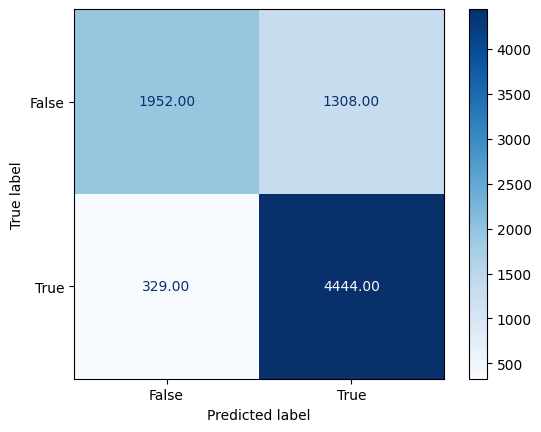

In [249]:
import matplotlib.pyplot as plt
from sklearn import metrics


# Normalizar la matriz de confusión dividiendo cada elemento por el número total de muestras
total_samples = disp_confusion_matrix.sum().sum()
#normalized_confusion_matrix = disp_confusion_matrix / total_samples

# Crear una instancia de ConfusionMatrixDisplay con la matriz normalizada
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=disp_confusion_matrix, display_labels=[False, True])

# Graficar la matriz de confusión normalizada
cm_display.plot(cmap=plt.cm.Blues, values_format='.2f')  # Usar '.2f' para mostrar valores con dos decimales



# Mostrar la gráfica
plt.show()


#MODEL_1
Redes Neuronales,embedding y nodo denso

In [38]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [39]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           12800000  
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 12800129 (48.83 MB)
Trainable params: 1

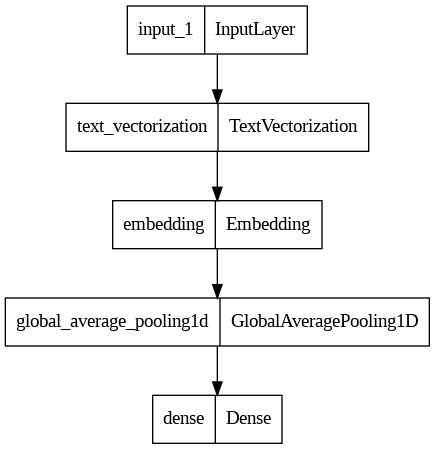

In [43]:
plot_model_and_save_image(model_1, file_name="model.png")

In [157]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [158]:
model_1_history = model_1.fit(x_train,
                              y_train,
                              epochs=10,
                              validation_data=(x_test, y_test),
                              )

Epoch 1/10
1004/1004 [==============================] - 17s 16ms/step - loss: 0.5503 - accuracy: 0.7184 - val_loss: 0.5024 - val_accuracy: 0.7568
Epoch 2/10
1004/1004 [==============================] - 9s 9ms/step - loss: 0.4702 - accuracy: 0.7754 - val_loss: 0.5069 - val_accuracy: 0.7531
Epoch 3/10
1004/1004 [==============================] - 10s 10ms/step - loss: 0.4358 - accuracy: 0.7981 - val_loss: 0.5208 - val_accuracy: 0.7441
Epoch 4/10
1004/1004 [==============================] - 8s 8ms/step - loss: 0.4086 - accuracy: 0.8133 - val_loss: 0.5452 - val_accuracy: 0.7378
Epoch 5/10
1004/1004 [==============================] - 10s 10ms/step - loss: 0.3868 - accuracy: 0.8237 - val_loss: 0.5713 - val_accuracy: 0.7295
Epoch 6/10
1004/1004 [==============================] - 13s 13ms/step - loss: 0.3691 - accuracy: 0.8327 - val_loss: 0.5975 - val_accuracy: 0.7226
Epoch 7/10
1004/1004 [==============================] - 10s 10ms/step - loss: 0.3540 - accuracy: 0.8387 - val_loss: 0.6253 - val

EVALUANDO EL MODELO 1

In [159]:
baseline_preds1 = model_1.predict(x_test)
baseline_preds1 = tf.squeeze(tf.round(baseline_preds1))
baseline_preds1

252/252 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(8033,), dtype=float32, numpy=array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)>

In [160]:
len(baseline_preds1), len(y_test)

(8033, 8033)

In [161]:
Red_Neuronal_embedding = calculando(y=y_test, y1=baseline_preds1)
Red_Neuronal_embedding

{'accuracy': 71.00709573011328,
 'precision': 0.7072117478583512,
 'recall': 0.7100709573011328,
 'f1': 0.7078644796040301}

In [162]:
disp_confusion_matrix=confusion_matrix(y_test,baseline_preds1)

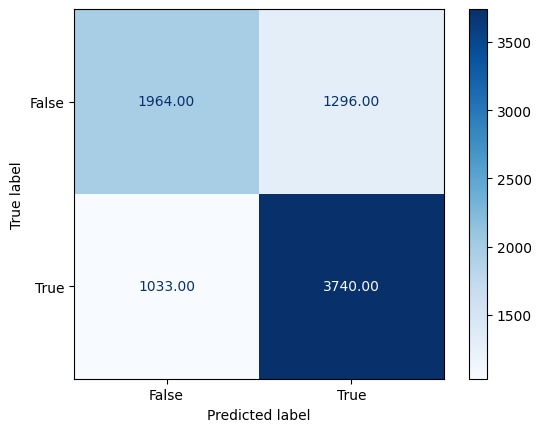

In [163]:
import matplotlib.pyplot as plt
from sklearn import metrics


# Normalizar la matriz de confusión dividiendo cada elemento por el número total de muestras
total_samples = disp_confusion_matrix.sum().sum()
#normalized_confusion_matrix = disp_confusion_matrix / total_samples

# Crear una instancia de ConfusionMatrixDisplay con la matriz normalizada
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=disp_confusion_matrix, display_labels=[False, True])

# Graficar la matriz de confusión normalizada
cm_display.plot(cmap=plt.cm.Blues, values_format='.2f')  # Usar '.2f' para mostrar valores con dos decimales



# Mostrar la gráfica
plt.show()


#MODEL_2

LSTM

In [44]:

from tensorflow.keras.callbacks import EarlyStopping

In [45]:
model_2_embedding = embedding
epochs=8
#  LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(128)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")
early_stopping = [EarlyStopping(monitor="val_accuracy", patience=epochs, mode="max")]


(None, 15, 128)


In [46]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [47]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           12800000  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                      

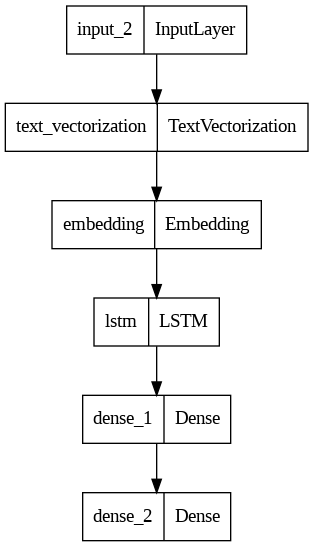

In [49]:
plot_model_and_save_image(model_2, file_name="model.png")

In [191]:
model_2_history = model_2.fit(x_train,
                              y_train,
                              epochs=epochs,
                              validation_data=(x_test, y_test), callbacks=early_stopping
                              )

Epoch 1/8
1004/1004 [==============================] - 22s 20ms/step - loss: 0.2220 - accuracy: 0.8995 - val_loss: 1.3182 - val_accuracy: 0.6783
Epoch 2/8
1004/1004 [==============================] - 10s 10ms/step - loss: 0.1309 - accuracy: 0.9406 - val_loss: 1.6724 - val_accuracy: 0.6808
Epoch 3/8
1004/1004 [==============================] - 11s 11ms/step - loss: 0.0956 - accuracy: 0.9574 - val_loss: 1.9146 - val_accuracy: 0.6665
Epoch 4/8
1004/1004 [==============================] - 13s 13ms/step - loss: 0.0781 - accuracy: 0.9664 - val_loss: 1.8836 - val_accuracy: 0.6670
Epoch 5/8
1004/1004 [==============================] - 10s 10ms/step - loss: 0.0627 - accuracy: 0.9734 - val_loss: 2.2255 - val_accuracy: 0.6791
Epoch 6/8
1004/1004 [==============================] - 10s 10ms/step - loss: 0.0506 - accuracy: 0.9795 - val_loss: 2.1307 - val_accuracy: 0.6715
Epoch 7/8
1004/1004 [==============================] - 14s 14ms/step - loss: 0.0413 - accuracy: 0.9829 - val_loss: 2.3027 - val_ac

EVALUANDO EL MODELO 2

In [168]:
baseline_preds2 = model_2.predict(x_test)
baseline_preds2 = tf.squeeze(tf.round(baseline_preds2))
baseline_preds2

252/252 [==============================] - 2s 4ms/step


<tf.Tensor: shape=(8033,), dtype=float32, numpy=array([1., 0., 1., ..., 1., 1., 1.], dtype=float32)>

In [169]:
len(baseline_preds2), len(y_test)

(8033, 8033)

In [170]:
LSTM = calculando(y=y_test, y1=baseline_preds2)
LSTM

{'accuracy': 68.1439063861571,
 'precision': 0.6779712578632318,
 'recall': 0.6814390638615709,
 'f1': 0.678906864735629}

In [171]:
disp_confusion_matrix=confusion_matrix(y_test,baseline_preds2)

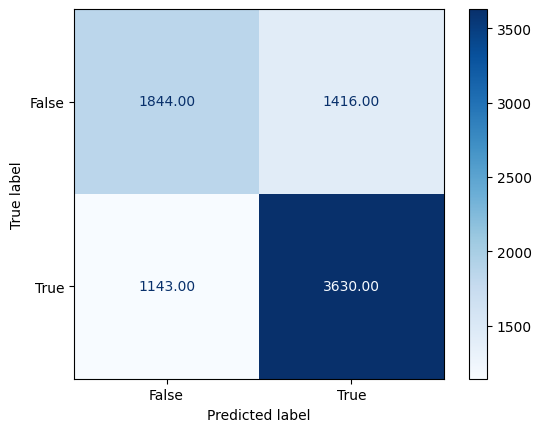

In [172]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Supongamos que ya tienes tu matriz de confusión disp_confusion_matrix

# Normalizar la matriz de confusión dividiendo cada elemento por el número total de muestras
total_samples = disp_confusion_matrix.sum().sum()
#normalized_confusion_matrix = disp_confusion_matrix / total_samples

# Crear una instancia de ConfusionMatrixDisplay con la matriz normalizada
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=disp_confusion_matrix, display_labels=[False, True])

# Graficar la matriz de confusión normalizada
cm_display.plot(cmap=plt.cm.Blues, values_format='.2f')  # Usar '.2f' para mostrar valores con dos decimales



# Mostrar la gráfica
plt.show()


#MODEL_3

GRU

In [50]:

model_3_embedding = layers.Embedding(input_dim=len(words_in_vocab),
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [51]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           5629568   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                       

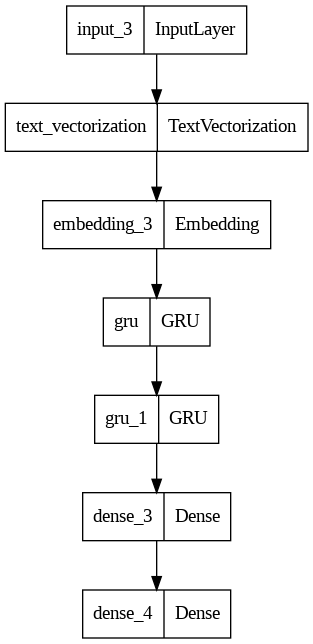

In [53]:
plot_model_and_save_image(model_3, file_name="model.png")

In [176]:
model_3_history = model_3.fit(x_train,
                              y_train,
                              epochs=10,
                              validation_data=(x_test, y_test)
                              )

Epoch 1/10
1004/1004 [==============================] - 34s 30ms/step - loss: 0.5415 - accuracy: 0.7256 - val_loss: 0.5100 - val_accuracy: 0.7503
Epoch 2/10
1004/1004 [==============================] - 12s 12ms/step - loss: 0.4565 - accuracy: 0.7856 - val_loss: 0.5182 - val_accuracy: 0.7439
Epoch 3/10
1004/1004 [==============================] - 10s 10ms/step - loss: 0.3881 - accuracy: 0.8283 - val_loss: 0.5589 - val_accuracy: 0.7286
Epoch 4/10
1004/1004 [==============================] - 11s 11ms/step - loss: 0.3091 - accuracy: 0.8635 - val_loss: 0.6921 - val_accuracy: 0.7219
Epoch 5/10
1004/1004 [==============================] - 11s 11ms/step - loss: 0.2450 - accuracy: 0.8916 - val_loss: 0.7897 - val_accuracy: 0.7002
Epoch 6/10
1004/1004 [==============================] - 11s 11ms/step - loss: 0.1960 - accuracy: 0.9124 - val_loss: 0.9490 - val_accuracy: 0.7036
Epoch 7/10
1004/1004 [==============================] - 10s 10ms/step - loss: 0.1577 - accuracy: 0.9299 - val_loss: 1.0139 -

EVALUANDO EL MODELO 3

In [177]:
baseline_preds3 = model_3.predict(x_test)
baseline_preds3 = tf.squeeze(tf.round(baseline_preds3))
baseline_preds3

252/252 [==============================] - 2s 5ms/step


<tf.Tensor: shape=(8033,), dtype=float32, numpy=array([1., 0., 1., ..., 1., 1., 0.], dtype=float32)>

In [178]:
len(baseline_preds3), len(y_test)

(8033, 8033)

In [179]:
GRU = calculando(y=y_test, y1=baseline_preds3)
GRU

{'accuracy': 68.9904145400224,
 'precision': 0.686649408844436,
 'recall': 0.689904145400224,
 'f1': 0.6875023445362036}

In [180]:
disp_confusion_matrix=confusion_matrix(y_test,baseline_preds3)

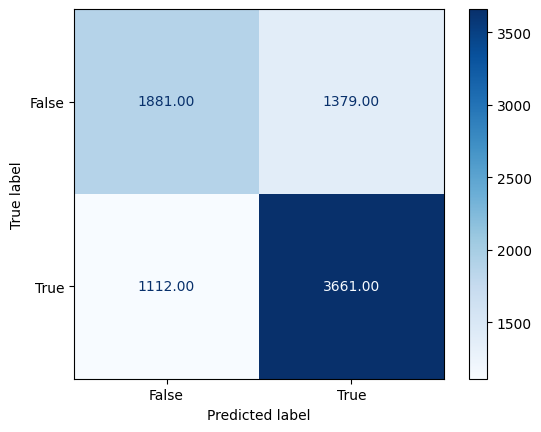

In [181]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Supongamos que ya tienes tu matriz de confusión disp_confusion_matrix

# Normalizar la matriz de confusión dividiendo cada elemento por el número total de muestras
total_samples = disp_confusion_matrix.sum().sum()
#normalized_confusion_matrix = disp_confusion_matrix / total_samples

# Crear una instancia de ConfusionMatrixDisplay con la matriz normalizada
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=disp_confusion_matrix, display_labels=[False, True])

# Graficar la matriz de confusión normalizada
cm_display.plot(cmap=plt.cm.Blues, values_format='.2f')  # Usar '.2f' para mostrar valores con dos decimales



# Mostrar la gráfica
plt.show()


#COMPARACION Y REVISION

In [245]:
all_model_results = pd.DataFrame({"MultinomialNB": baseline_results,
                                  "Red_Neuronal_embedding": Red_Neuronal_embedding ,
                                  "LSTM": LSTM,
                                  "GRU": GRU,
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
MultinomialNB,79.621561,0.806351,0.796216,0.787691
Red_Neuronal_embedding,71.007096,0.707212,0.710071,0.707864
LSTM,68.143906,0.677971,0.681439,0.678907
GRU,68.990415,0.686649,0.689904,0.687502


In [246]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

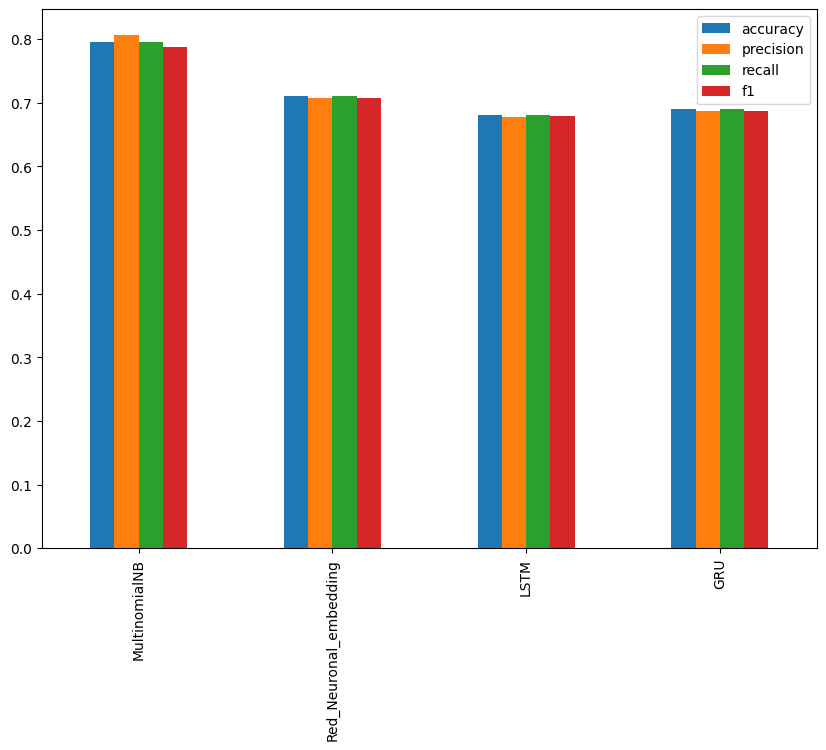

In [247]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

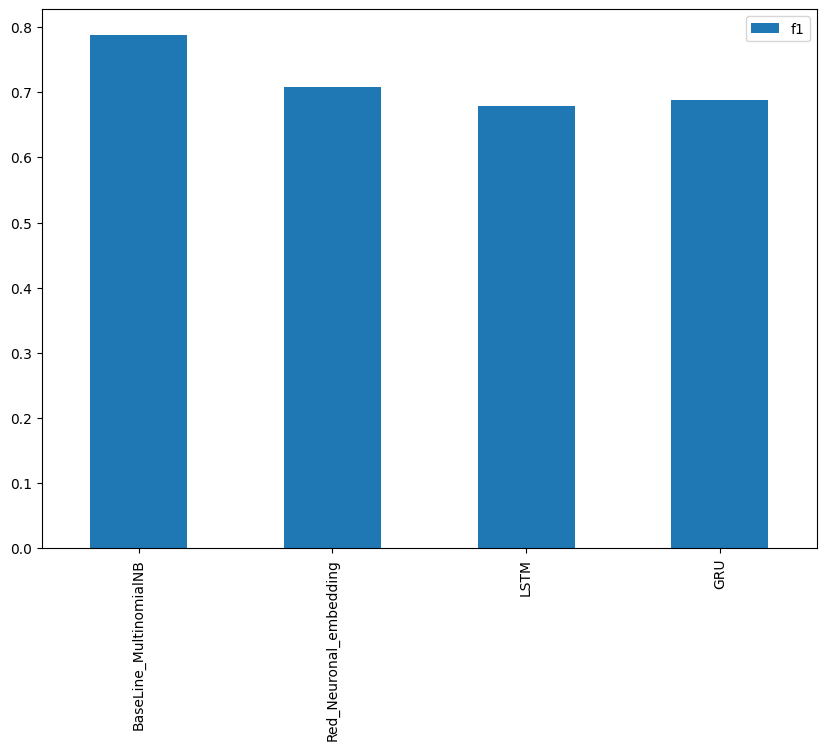

In [197]:
all_model_results.f1.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

VALIDANDO EL MODELO CON MUESTRAS NUEVAS

In [253]:
def predict_on_sentence(model, sentence):
  pred_prob = model.predict([sentence])
  #pred_label = np.argmax(pred_prob, axis=1)
  print(f"Pred: {pred_prob}", "(No le gusta)" if pred_prob < 1 else "(Le gusta)")


In [254]:
sample_tweet1 = "Bathtubs. Lack of personnel to address the problem quickly and no solution. Although the restaurant staff was very friendly, we will not return."
predict_on_sentence(model_0,sentence=sample_tweet1)


Pred: [0] (No le gusta)


In [255]:
sample_tweet2 = "The best Pisco Sour of my life and you knew I already had plenty of them. Thanks to my friend Gerard.Now I'm going to try the Captain. I'm sure it will be so delicious.The Hotel is nice and is in the central part of Cusco."
predict_on_sentence(model_0,sentence=sample_tweet2)


Pred: [1] (Le gusta)
